In [1]:
#Imports
import pandas as pd
import numpy as np

import matplotlib.pylab as plt


In [2]:
df=pd.read_csv('iris-data.csv')

In [3]:
df.head()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['class'].unique() #hay un typo: está setosa y setossa ( doble 's')

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum() #5 nulos en petal_width (cm)

nan_cols=df.isna().sum()


In [7]:
df['class'] = [e.replace('Iris-setossa' , 'Iris-setosa') for e in df['class']] #corregimos el typo: cambiamos setossa por setosa
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'versicolor', 'Iris-virginica'],
      dtype=object)

In [8]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iqr=df['sepal_length_cm'].quantile(0.75)-df['sepal_length_cm'].quantile(0.25)
iqr

1.3000000000000007

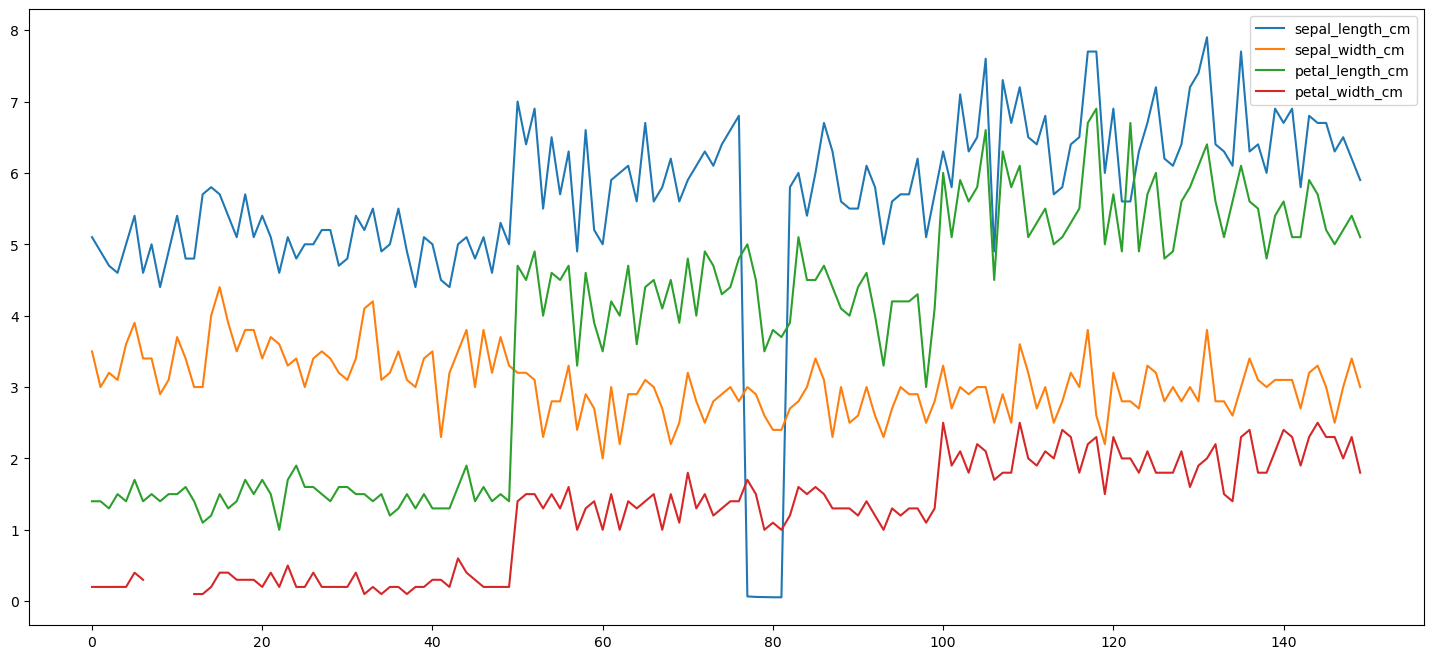

In [10]:
lines = df.plot.line(figsize=(18,8))


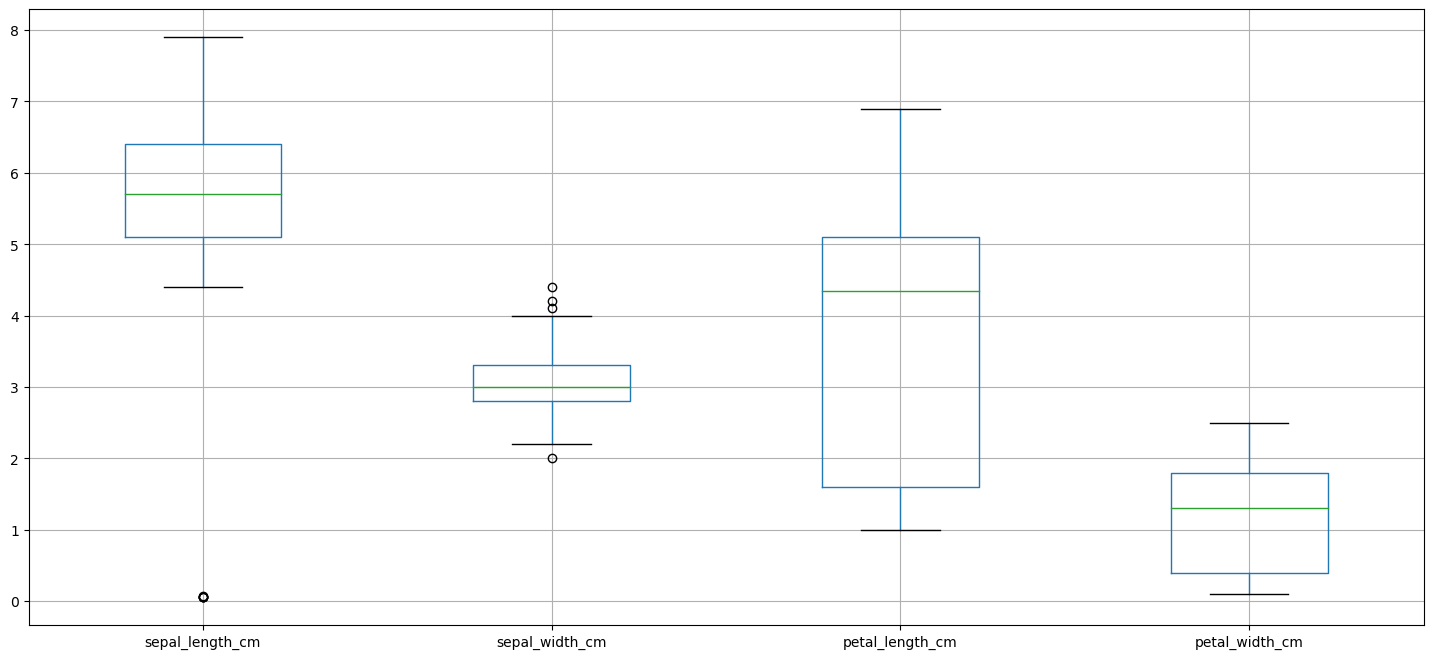

In [11]:
boxplot=df.boxplot(figsize=(18,8))

In [19]:
''''outlayers=df['sepal_length_cm']<df['sepal_length_cm'].quantile(0)
outlayers
'''

Q1 = df['sepal_length_cm'].quantile(0.25)
Q3 = df['sepal_length_cm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar los outliers
filtered_df = df[(df['sepal_length_cm'] >= lower_bound) & (df['sepal_length_cm'] <= upper_bound)]
df=filtered_df
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   140 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [23]:
df['petal_width_cm'].isnull().sum()

5

In [24]:
df_cleaned=df.dropna(subset=['petal_width_cm'])

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  140 non-null    float64
 1   sepal_width_cm   140 non-null    float64
 2   petal_length_cm  140 non-null    float64
 3   petal_width_cm   140 non-null    float64
 4   class            140 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


In [26]:
df.to_csv('cleaning_challenge.csv')